In [1]:
from pathlib import Path

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyprojroot
import seaborn as sns

import searchnets

In [2]:
def cm_to_inches(cm):
    return cm / 2.54

In [3]:
mpl.style.use(['seaborn-darkgrid', 'seaborn-paper'])

paths

In [4]:
SOURCE_DATA_ROOT = pyprojroot.here('results/searchstims/source_data/10stims')

FIGURES_ROOT = pyprojroot.here('docs/paper/figures/experiment-1/searchstims-10stims')

constants

In [5]:
LEARNING_RATE = 1e-3

NET_NAMES = [
    'alexnet',
    'VGG16',
    'CORnet_Z',
    'CORnet_S',
]

METHODS = [
    'initialize',
    'transfer'
]

MODES = [
    'classify',
]

## load source data

Get just the transfer learning results, then group by network, stimulus, and set size, and compute the mean accuracy for each set size.

In [6]:
df_all = pd.read_csv(
    SOURCE_DATA_ROOT.joinpath('all.csv')
)

stim_acc_diff_df = pd.read_csv(
    SOURCE_DATA_ROOT.joinpath('stim_acc_diff.csv')
)

net_acc_diff_df = pd.read_csv(
    SOURCE_DATA_ROOT.joinpath('net_acc_diff.csv')
)

df_acc_diff_by_stim = pd.read_csv(
    SOURCE_DATA_ROOT.joinpath('acc_diff_by_stim.csv'),
    index_col='net_name'
)

## plot figure

In [7]:
acc_diff_mat = df_acc_diff_by_stim.to_numpy()
acc_diff_stim_mean = acc_diff_mat.mean(0)
acc_diff_net_mean = acc_diff_mat.mean(1)

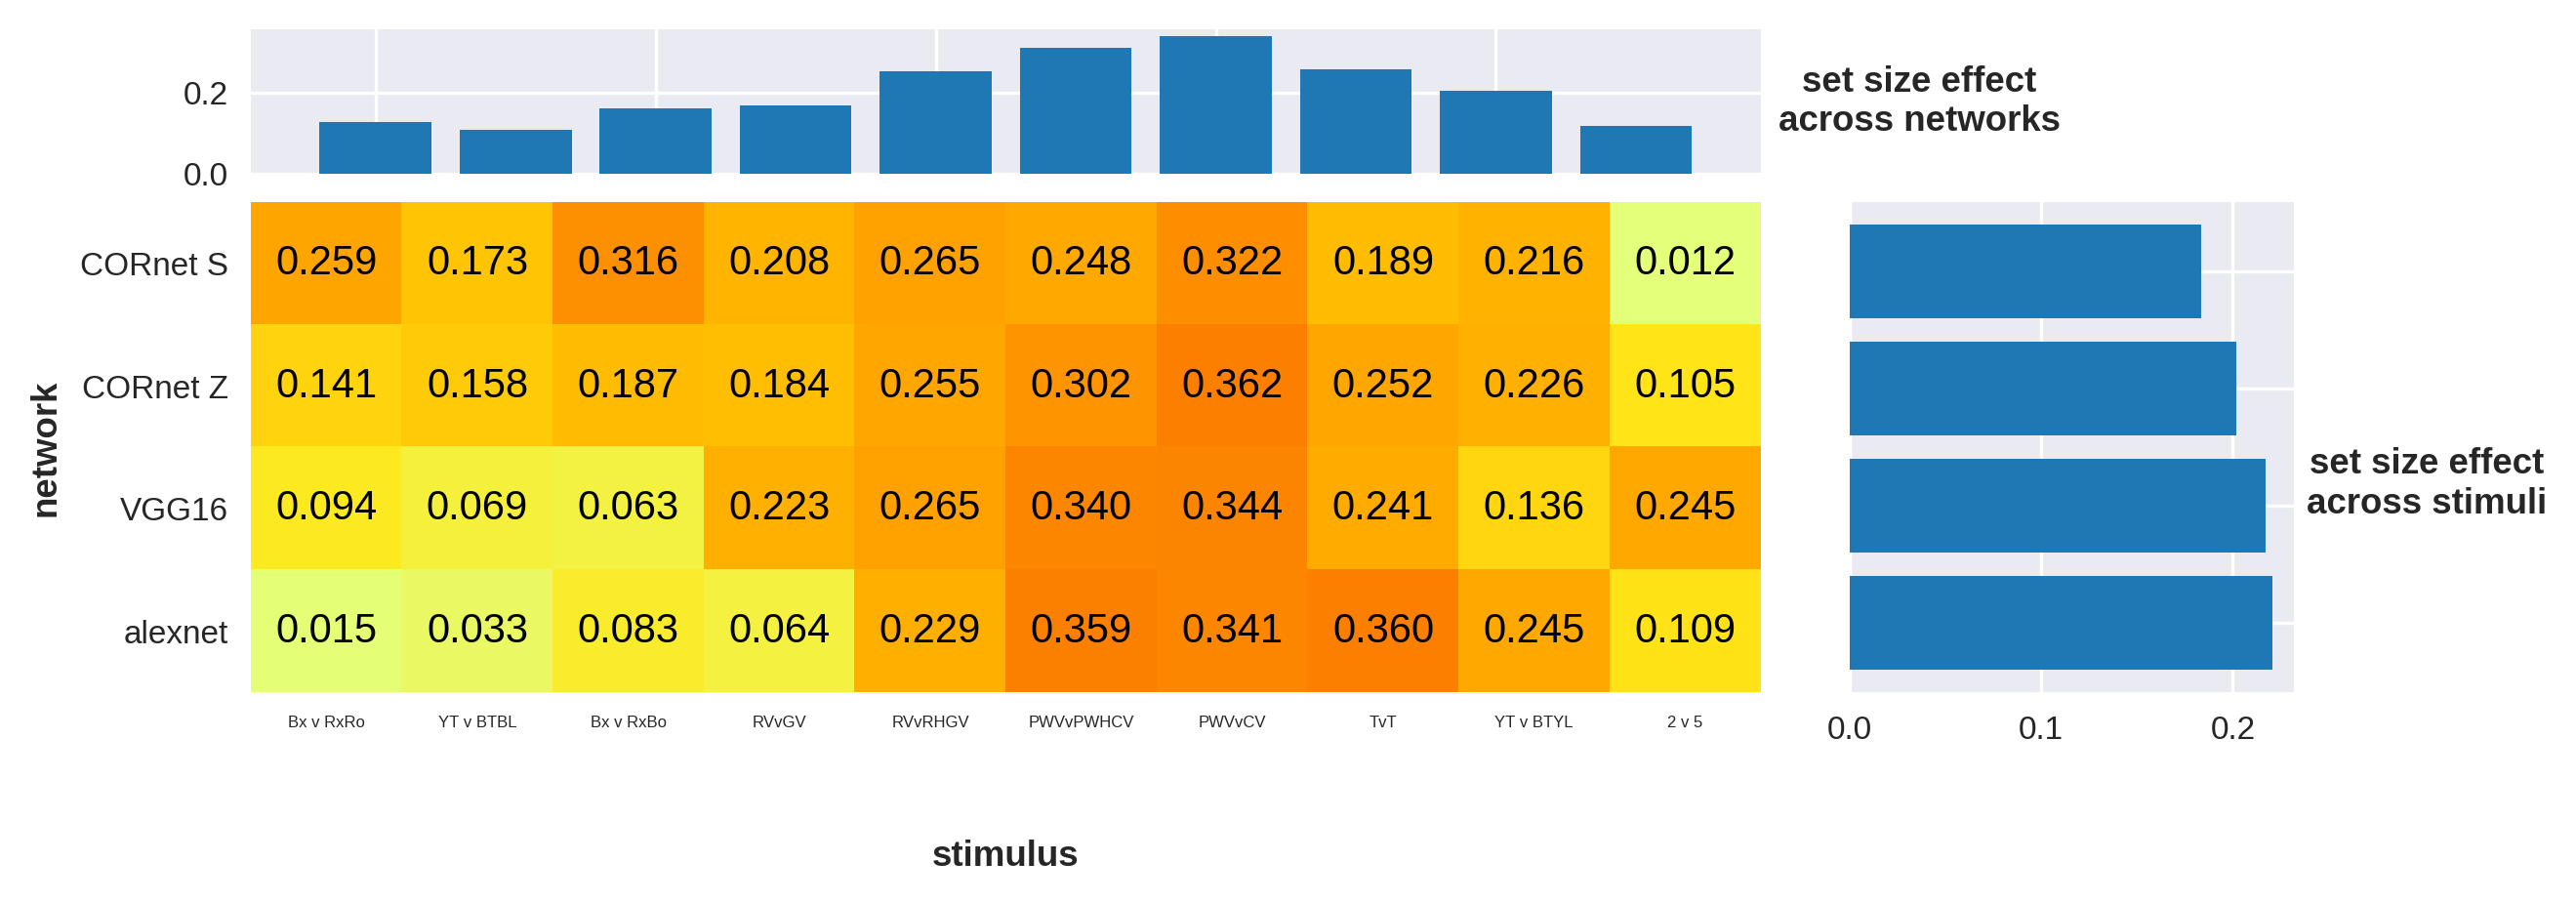

In [32]:
from matplotlib.gridspec import GridSpec

if '3stims' in str(FIGURES_ROOT):
    FIGSIZE=(3, 3)
elif '10stims' in str(FIGURES_ROOT):
    FIGSIZE=(9, 3)

if '3stims' in str(FIGURES_ROOT):
    STIM_FONTSIZE = None
elif '10stims' in str(FIGURES_ROOT):
    STIM_FONTSIZE = 4
    
fig = plt.figure(figsize=FIGSIZE, dpi=300)

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.imshow(acc_diff_mat, cmap=plt.get_cmap('Wistia'), aspect='auto')
ax_joint.grid(False)
ax_joint.set_xticks(np.arange(acc_diff_mat.shape[1]))
ax_joint.set_yticks(np.arange(acc_diff_mat.shape[0]))
xticklabels = (lbl.replace('_', ' ') for lbl in df_acc_diff_by_stim.columns)
ax_joint.set_xticklabels(xticklabels, fontsize=STIM_FONTSIZE)
yticklabels = (lbl.replace('_', ' ') for lbl in df_acc_diff_by_stim.index.values)
ax_joint.set_yticklabels(yticklabels)
for i in range(acc_diff_mat.shape[0]):
    for j in range(acc_diff_mat.shape[1]):
        effect_size = acc_diff_mat[i, j]
        text = ax_joint.text(j, i, f'{effect_size:0.3f}', 
                             ha="center", va="center", color="k")

ax_marg_x.bar(np.arange(len(acc_diff_stim_mean)), acc_diff_stim_mean)
ax_marg_y.barh(np.arange(len(acc_diff_net_mean)), acc_diff_net_mean)

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel('stimulus', fontweight='bold')
ax_joint.set_ylabel('network', fontweight='bold')
if '3stims' in str(FIGURES_ROOT):
    ax_joint.xaxis.set_label_coords(0.5,-0.3)
elif '10stims' in str(FIGURES_ROOT):
    ax_joint.xaxis.set_label_coords(0.5,-0.3)

# Set labels on marginals
ax_marg_x.set_xlabel('set size effect\nacross networks', fontweight='bold')
ax_marg_x.xaxis.set_label_coords(1.105, .75)

ax_marg_y.set_xlabel('set size effect\nacross stimuli', fontweight='bold')
ax_marg_y.xaxis.set_label_coords(1.3, .5)

for ext in ('svg', 'png'):
    fig_path = FIGURES_ROOT.joinpath(
        f'effect-size-heat-map/effect-size-heat-map.{ext}'
    )
    plt.savefig(fig_path)